#### Ensure that all libraries are installed 

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt

Load MNIST dataset from the web

In [0]:
( train_images, train_labels ), ( test_images, test_labels ) = mnist.load_data()

#outputting the shape of the data
print('')
print( 'train images shape: ' )
print( train_images.shape )
len( train_labels )
print( train_labels )
print('')

print( 'test images shape: ' )
print( test_images.shape )
len( test_labels )
print( test_labels )
print('')



train images shape: 
(60000, 28, 28)
[5 0 4 ... 5 6 8]

test images shape: 
(10000, 28, 28)
[7 2 1 ... 4 5 6]



Visualize a random image in the train dataset

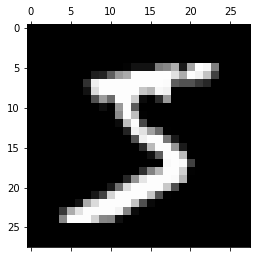

In [0]:
plt.matshow( train_images[0], cmap = 'gray' )
plt.show()

In [0]:
print( train_labels[0] )

5


We start with reshaping the data for the convnet.

notice we changed up the hyperparameters for this.
Rather than using reshape: ( 60000, 28 * 28 ).
We instead used: ( 60000, 28, 28, 1 ).

This is because we need this format to fit the input shape of the model.

Other than that we are still operating on the premise:

1. shaping the data for the model.
2. encoding the labels for both training and testing sets.
3. compiling and training the model with training data.
4. evaluating the model with the test data.

In [0]:
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
test_images = test_images.reshape( ( 10000, 28, 28, 1 ) )
test_images = test_images.astype( 'float32' ) / 255
train_labels = to_categorical( train_labels )
test_labels = to_categorical( test_labels )
print( train_labels.shape )
print( train_labels[0] )

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


This is the convolutional network. While you could use just the Dense layers to achieve digit identification. You could gain even more accuracy if you use convolutional network. So the idea is to use a filter that will create localized values which will piece together to identify digits.

So here we have a couple of functions from layers:

Conv2D is the convolutional layer.
Conv2D( filters, ( filter_height, filter_width ), ( activation ), ( input_shape ) )

The filter will move through the image pixel by pixel ( or "convolves") around the image picking up values.
This will create an output of: 26 x 26.

MaxPooling2D( height, width )
MaxPooling layer just takes the highest values from the Convolutional layer and puts it in height x width. 
It will create an output of 2 x 2 format with the highest values from within the 4 squares.

The last layer: model.add( layers.Dense( 10. activation = 'softmax' )

So here we have 10 neurons which will associate, imagine digits between 0 and 9. Each neuron will contain values be between 0 - 1 and all of the values will sum to 1.

So basically we have a probability for a digit prediction. The highest probability will be the model's prediction for the digit.

In [0]:
model = models.Sequential()
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape=( 28, 28, 1 ) ) )
model.add( layers.MaxPooling2D( ( 2, 2 ) ) )
model.add( layers.Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 4)         580       
_________________________________________________________________
flatten_13 (Flatten)         (None, 484)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4850      
Total params: 5,590
Trainable params: 5,590
Non-trainable params: 0
_________________________________________________________________


compiling and training the model

The model will be trained with the fit function.

In [0]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
model.fit( train_images, train_labels, epochs = 4, batch_size = 64 )

Epoch 1/4
60000/60000 [==============================] - 36s 596us/step - loss: 0.3962 - acc: 0.88261s - loss: 0.4047 - acc - ETA: 1s - loss: 0.401
Epoch 2/4
60000/60000 [==============================] - 34s 566us/step - loss: 0.1484 - acc: 0.9571
Epoch 3/4
60000/60000 [==============================] - 35s 584us/step - loss: 0.1000 - acc: 0.9701
Epoch 4/4
60000/60000 [==============================] - 40s 674us/step - loss: 0.0822 - acc: 0.9757


In [0]:
#evaluating the model with the test data now
test_loss, test_acc = model.evaluate( test_images, test_labels )
print( 'test_acc:', test_acc )

10000/10000 [==============================] - 2s 248us/step
test_acc: 0.9803


We are visualzing the data for the test images. 

the test_images paramaters are different because we are calling a reshaped test_images, so the parameters have to match accordingly.

notice the test_labels is also reshaped. Rather than seeing a value of 0, we get an array of 10 in binary form.

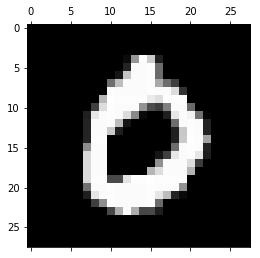

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
plt.matshow( test_images[3, :, :, 0], cmap = 'gray' )
plt.show()
print( test_labels[3] )

Visualizing the predictions predictions on the unseen data
This is going to show us how the model is predicting the images.

The output is an array of values where each value is associated to a digit.

In [0]:
predictions = model.predict( test_images )
print( predictions[3] )

[2.0113177e-05 9.9873263e-01 1.6517809e-04 4.9386581e-06 8.3775027e-05
 5.8080195e-07 3.7865896e-06 9.6657081e-04 2.1212572e-05 1.3536053e-06]


After rounding we can see the output of the prediction. Here the model predicted the digit is 0, which is correct.

In [0]:
print( predictions[3].round() )

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


So here we used a convolutional neural network to predict the number for the images of digits. 
While we only managed ~98-97% we could actually get ~99% if we were able to add more capabilities to the model.

There will be a supplimentary file that you can download and try with more time available or better computer.